In [1]:
from cheaper.params import CheapERParams
from pipeline import cheaper_train
from pipeline import get_datasets

# get datasets
datasets = get_datasets()
beers_dataset = datasets[5]

In [4]:
# cheapER parameters' settings
params = CheapERParams()
params.epochs = 15
params.models = ['distilroberta-base']
params.adaptive_ft = False
params.lr = 2e-6
params.lr_multiplier = 10
params.sigma = 200
params.kappa = 20
params.epsilon = 0.015
params.threshod = 0
params.slicing = [0.33]

CheapER: training on dataset "beers"
CheapER: using params "sigma=200,kappa=20,epsilon=0.015,adaptive_ft=False,num_runs=1,normalize=True,sim_length=5,warmup=False,epochs=15,lr=2e-06,attribute_shuffle=False,identity=False,symmetry=False,models=['distilroberta-base'],slicing=[0.33],compare=False,generated_only=True,approx=perceptron,balance=[0.5, 0.5],adjust_ds_size=False,batch_size=8,silent=True,deeper_trick=False,consistency=False,sim_edges=True,simple_slicing=True,use_model=noisy-student,teaching_iterations=3,lr_multiplier=10,data_noise=True,temperature=None,discard_old_data=False,use_scores=False,threshold=0.5"
Generating dataset
Parsing original dataset


loading configuration file https://huggingface.co/distilroberta-base/resolve/main/config.json from cache at /home/tteofili/.cache/huggingface/transformers/42d6b7c87cbac84fcdf35aa69504a5ccfca878fcee2a1a9b9ff7a3d1297f9094.aa95727ac70adfa1aaf5c88bea30a4f5e50869c68e68bce96ef1ec41b5facf46
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file https://huggingface.co/distilroberta-base/resolve/main/vocab.json 

------------- Teacher Training distilroberta-base ------------------
Training with 88 record pairs (33.0% GT)
Using custom data configuration default-51ab2bc96a109884


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-51ab2bc96a109884/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-0effe8a4f1ae2c42


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-0effe8a4f1ae2c42/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/88 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 88
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 165


Epoch,Training Loss,Validation Loss,F1
1,0.620000,0.595355,0.000000
2,0.608900,0.578321,0.000000
3,0.583000,0.562707,0.000000
4,0.570600,0.548796,0.000000
5,0.566900,0.535930,0.000000
6,0.563000,0.524646,0.000000
7,0.544900,0.514650,0.000000
8,0.550800,0.506040,0.000000
9,0.555400,0.498306,0.000000
10,0.540200,0.491865,0.000000


***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-11
Configuration saved in ./results/checkpoint-11/config.json
Model weights saved in ./results/checkpoint-11/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-11/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-11/special_tokens_map.json
Deleting older checkpoint [results/checkpoint-481] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-22
Configuration saved in ./results/checkpoint-22/config.json
Model weights saved in ./results/checkpoint-22/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-22/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-22/special_tokens_map.json
Deleting older checkpoint [results/checkpoint-555] due to args.save_total_limit
***** Running Evaluation *****
  Num example

***** Eval results after epoch -1 *****
eval_loss: 0.5985937217871348
f1_score: 0.0
report:               precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

simple_accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        77
           1       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

Generating dataset
Parsing original dataset
match number: 18 no match number: 70


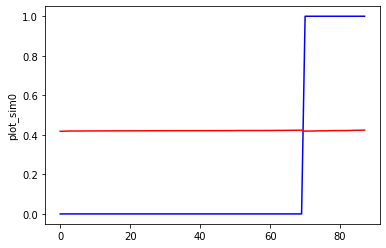

min_sim_Match 0.5max_sim_noMatch 0.5
!max_sim 0.515
!min_sim 0.485
--------------- Generating datasets --------------
min_cos_sim 0.2773500981126146
4345
3000
4345
3000
4345
LSH blocking started
903 pairs found
LSH blocking done


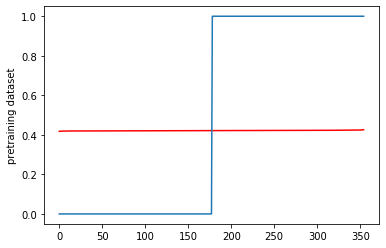

0 positive pairs found via LSH blocking and high similarity check
355 negative pairs found via LSH blocking and low similarity check
max pair visit: 1000
dizionari
listL_match[0]
0


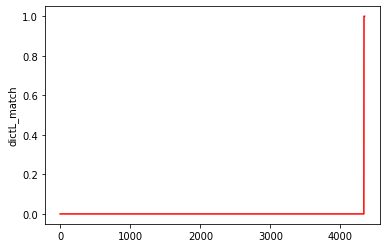

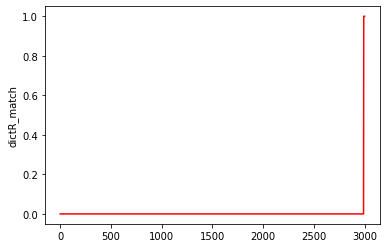

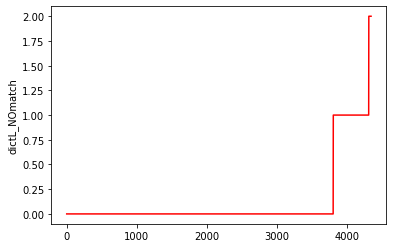

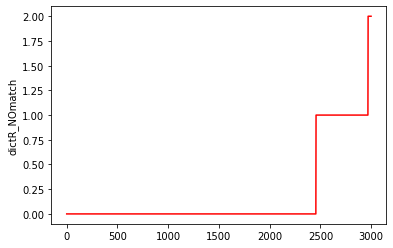

create candidates set
0 matches, 575 non-matches, 20 consistency pairs
dizionari occorrenze degli attributi del dataset di pt


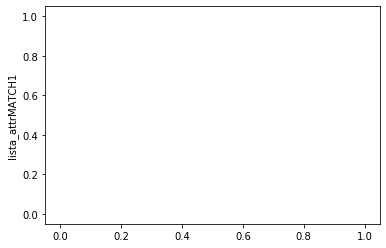

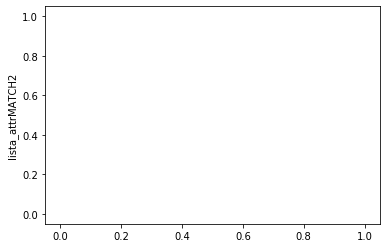

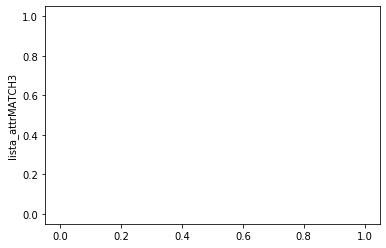

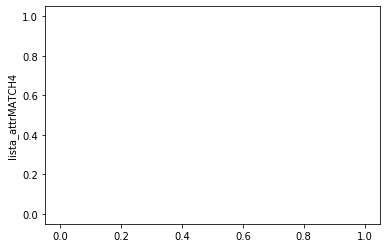

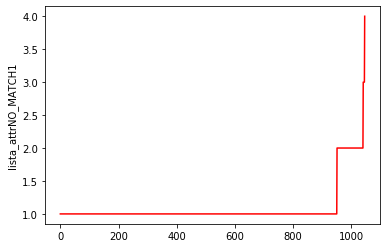

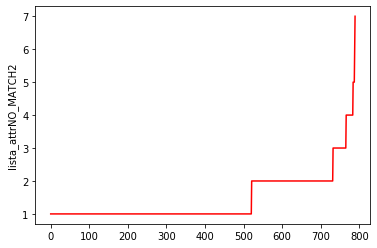

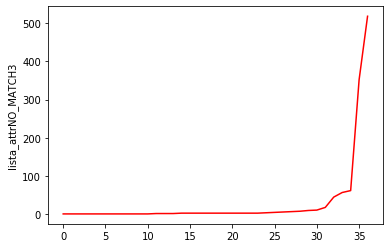

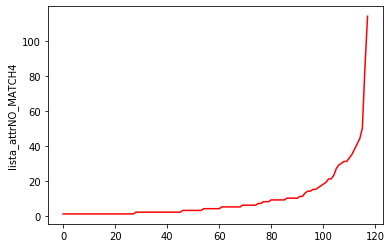

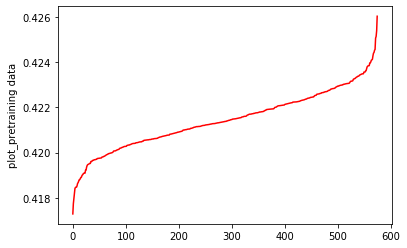

k_slice 100


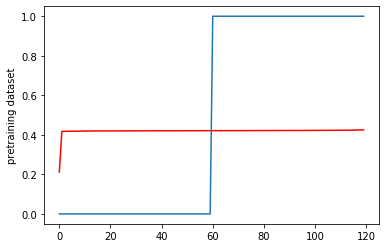

--------------- data augmentation creating dataset --------------
using threshold=0.515 to approximate label
discarded 0 elements


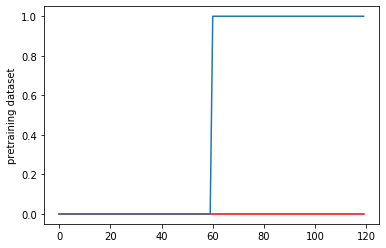

Previous generated dataset size: 0
New generated dataset size: 120


loading configuration file https://huggingface.co/distilroberta-base/resolve/main/config.json from cache at /home/tteofili/.cache/huggingface/transformers/42d6b7c87cbac84fcdf35aa69504a5ccfca878fcee2a1a9b9ff7a3d1297f9094.aa95727ac70adfa1aaf5c88bea30a4f5e50869c68e68bce96ef1ec41b5facf46
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file https://huggingface.co/distilroberta-base/resolve/main/vocab.json 

------------- Student Training distilroberta-base -----------------
Training with 208 record pairs (120 generated, 88 GT)
Using custom data configuration default-e385d0e49dc5ab65


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-e385d0e49dc5ab65/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.
Using custom data configuration default-a80441442c52194a


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/tteofili/.cache/huggingface/datasets/csv/default-a80441442c52194a/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/208 [00:00<?, ?ex/s]

  0%|          | 0/91 [00:00<?, ?ex/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 208
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 390


Epoch,Training Loss,Validation Loss,F1
1,0.434900,0.632137,0.000000
2,0.335800,0.601885,0.000000
3,0.341400,0.591311,0.000000
4,0.316100,0.567640,0.000000
5,0.323100,0.617937,0.000000
6,0.326300,0.639669,0.000000
7,0.297300,0.584563,0.000000


***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-26
Configuration saved in ./results/checkpoint-26/config.json
Model weights saved in ./results/checkpoint-26/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-26/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-26/special_tokens_map.json
Deleting older checkpoint [results/checkpoint-11] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 91
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-52
Configuration saved in ./results/checkpoint-52/config.json
Model weights saved in ./results/checkpoint-52/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-52/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-52/special_tokens_map.json
Deleting older checkpoint [results/checkpoint-165] due to args.save_total_limit
***** Running Evaluation *****
  Num examples

In [ ]:
results_df = cheaper_train(beers_dataset, params)
print(results_df)